<a href="https://colab.research.google.com/github/dewarakaks/Backend-Using-Flask/blob/main/Python_Dewa_Raka_Krisna_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
file_path = '/content/Sample Data - Servis.csv'
df = pd.read_csv('/content/Sample Data - Servis.csv')
print(df.head())

   Nomor Servis      Kota    Brand       Barang Tanggal Masuk Tanggal Selesai  \
0             1  Semarang   Laifen        SWIFT     8/27/2024        9/9/2024   
1             2   Jakarta   Laifen        SWIFT     6/30/2024       7/12/2024   
2             3   Jakarta  Ecovacs  X5 PRO OMNI      2/6/2024        2/9/2024   
3             4   Jakarta   Laifen           SE      3/6/2024       3/11/2024   
4             5  Semarang   Laifen           SE     4/30/2024        5/2/2024   

  Teknisi  Selisih Hari Kerja  Bulan Masuk Tingkat Kesulitan      Biaya  \
0   David                  10            8      Sangat Mudah   Rp50,000   
1    Budi                  10            6            Sedang  Rp300,000   
2     Eko                   4            2      Sangat Mudah   Rp50,000   
3     Eko                   4            3             Sulit  Rp750,000   
4    Andi                   3            4             Sulit  Rp750,000   

   Max Waktu Pengerjaan Sesuai Deadline?     Denda    Komisi  

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nomor Servis          5000 non-null   int64 
 1   Kota                  5000 non-null   object
 2   Brand                 5000 non-null   object
 3   Barang                5000 non-null   object
 4   Tanggal Masuk         5000 non-null   object
 5   Tanggal Selesai       5000 non-null   object
 6   Teknisi               5000 non-null   object
 7   Selisih Hari Kerja    5000 non-null   int64 
 8   Bulan Masuk           5000 non-null   int64 
 9   Tingkat Kesulitan     5000 non-null   object
 10  Biaya                 5000 non-null   object
 11  Max Waktu Pengerjaan  5000 non-null   int64 
 12  Sesuai Deadline?      5000 non-null   object
 13  Denda                 5000 non-null   object
 14  Komisi                5000 non-null   object
dtypes: int64(4), object(11)
memory usage: 

In [28]:
print(df.describe())

       Nomor Servis  Selisih Hari Kerja  Bulan Masuk  Max Waktu Pengerjaan
count   5000.000000         5000.000000   5000.00000           5000.000000
mean    2500.500000            6.120000      5.01820              6.356400
std     1443.520003            2.925699      2.57744              4.999238
min        1.000000            0.000000      1.00000              1.000000
25%     1250.750000            4.000000      3.00000              3.000000
50%     2500.500000            6.000000      5.00000              7.000000
75%     3750.250000            9.000000      7.00000             14.000000
max     5000.000000           11.000000      9.00000             14.000000


Teknisi yang Tidak Sesuai Deadline:
Teknisi
Coki     353
Budi     332
Firas    331
Gery     331
Andi     318
Eko      312
Heru     300
David    293
Name: count, dtype: int64


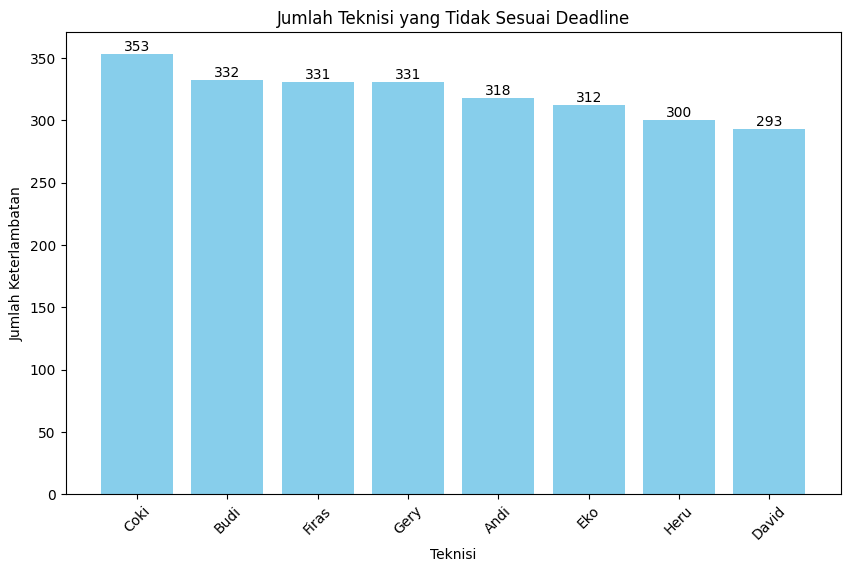

In [60]:
# Visualisasi teknisi tidak sesuai deadline
late_technicians = df[df['Sesuai Deadline?'] == 'Tidak']
late_technicians_count = late_technicians['Teknisi'].value_counts()

# Print the results
print("Teknisi yang Tidak Sesuai Deadline:")
print(late_technicians_count)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(late_technicians_count.index, late_technicians_count.values, color='skyblue')
plt.title('Jumlah Teknisi yang Tidak Sesuai Deadline')
plt.xlabel('Teknisi')
plt.ylabel('Jumlah Keterlambatan')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.show()

Frekuensi Layanan per Kota:
Kota
Yogyakarta    1030
Bandung       1019
Surabaya      1008
Semarang       976
Jakarta        967
Name: count, dtype: int64


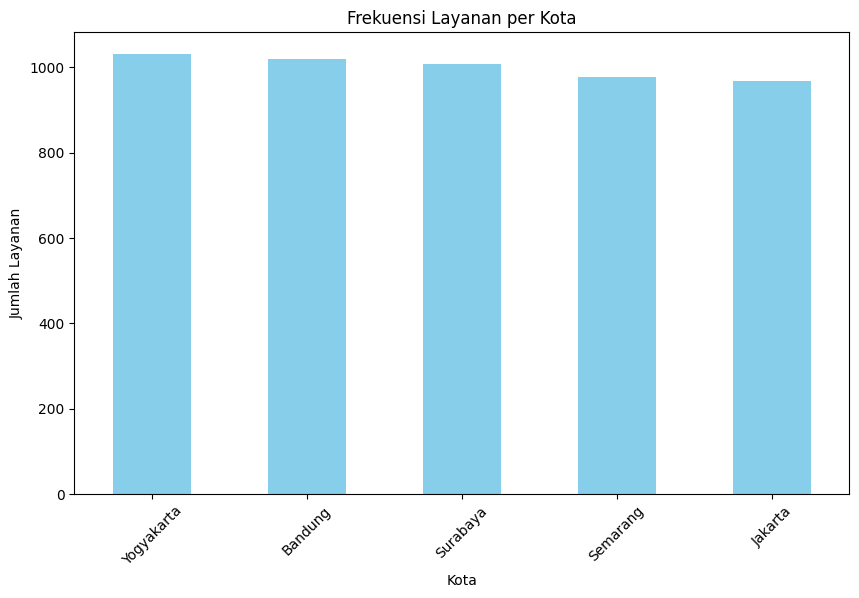

In [62]:
# Menghitung frekuensi layanan per kota
service_frequency_city = df['Kota'].value_counts()

# Menampilkan frekuensi layanan per kota
print("Frekuensi Layanan per Kota:")
print(service_frequency_city)

# Plot frekuensi layanan per kota
plt.figure(figsize=(10, 6))
service_frequency_city.plot(kind='bar', color='skyblue')
plt.title('Frekuensi Layanan per Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Layanan')
plt.xticks(rotation=45)
plt.show()


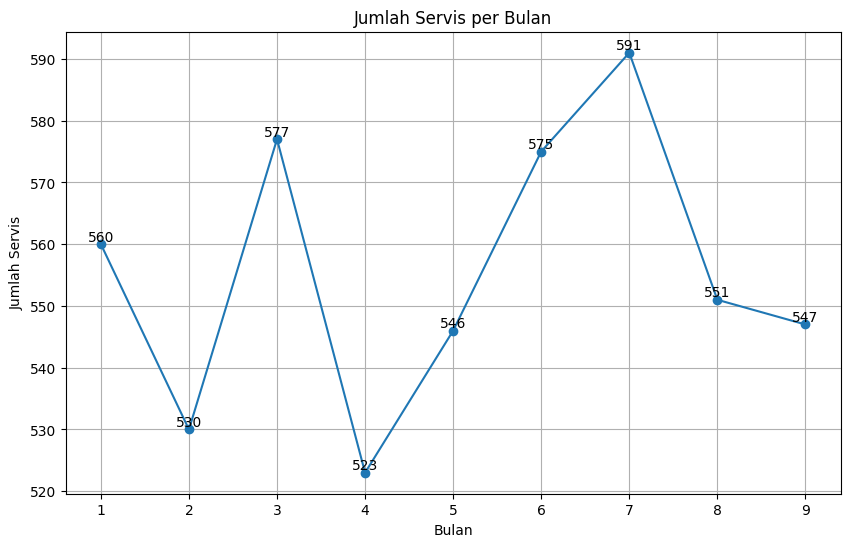

In [94]:
df['Tanggal Masuk'] = pd.to_datetime(df['Tanggal Masuk'])

# Create a new column for the month
df['Month'] = df['Tanggal Masuk'].dt.month

# Group by month and count the number of services
services_by_month = df.groupby('Month')['Tanggal Masuk'].count()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(services_by_month.index, services_by_month.values, marker='o')
plt.title('Jumlah Servis per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Servis')
plt.xticks(services_by_month.index)
plt.grid(True)

# Add data labels to the plot
for x, y in zip(services_by_month.index, services_by_month.values):
  plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

# Assuming 'Label' column contains the labels for your data
# Create a line chart to visualize the data according to labels
if 'Label' in df.columns:
  label_counts = df.groupby(['Month', 'Label'])['Tanggal Masuk'].count().unstack()
  label_counts.plot(kind='line', figsize=(10, 6))
  plt.title('Jumlah Servis per Bulan berdasarkan Label')
  plt.xlabel('Bulan')
  plt.ylabel('Jumlah Servis')
  plt.xticks(label_counts.index)
  plt.legend(title='Label')
  plt.grid(True)
  plt.show()

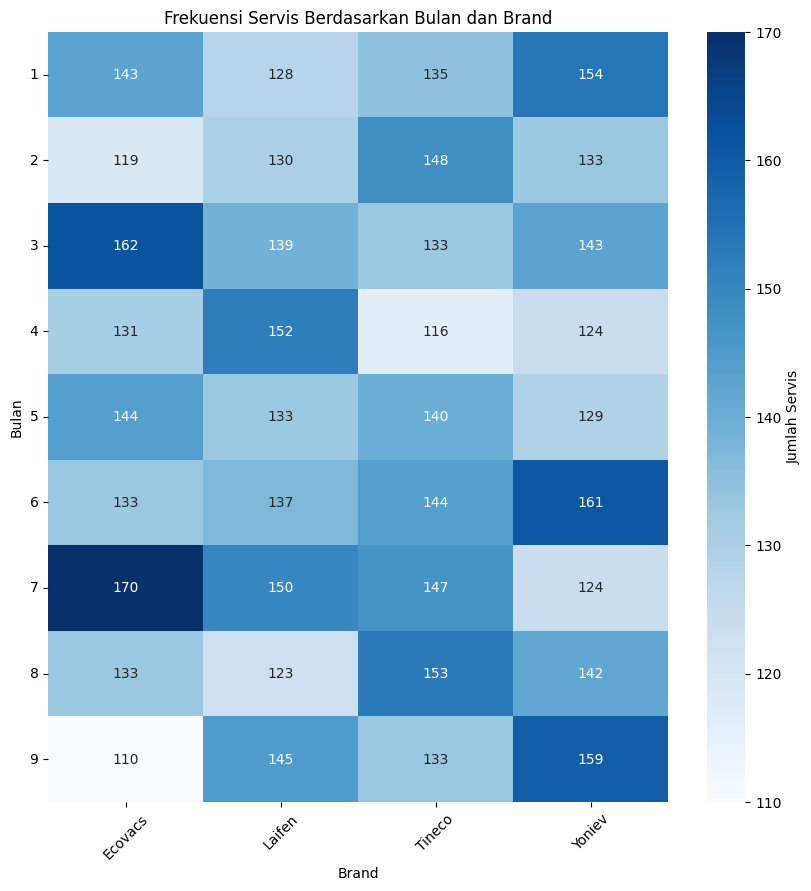

In [95]:
df['Tanggal Masuk'] = pd.to_datetime(df['Tanggal Masuk'])

df['Month'] = df['Tanggal Masuk'].dt.month
# Group by Month dan Brand, kemudian hitung jumlah servis
frequency_by_month_brand = df.groupby(['Month', 'Brand']).size().unstack(fill_value=0)
# Plot heatmap
plt.figure(figsize=(10, 10))  # Menyesuaikan ukuran agar lebih kotak
sns.heatmap(frequency_by_month_brand, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Jumlah Servis'})
plt.title('Frekuensi Servis Berdasarkan Bulan dan Brand')
plt.xlabel('Brand')
plt.ylabel('Bulan')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Teknisi yang Tidak Sesuai Deadline:
Brand
Yoniev     1269
Tineco     1249
Ecovacs    1245
Laifen     1237
Name: count, dtype: int64


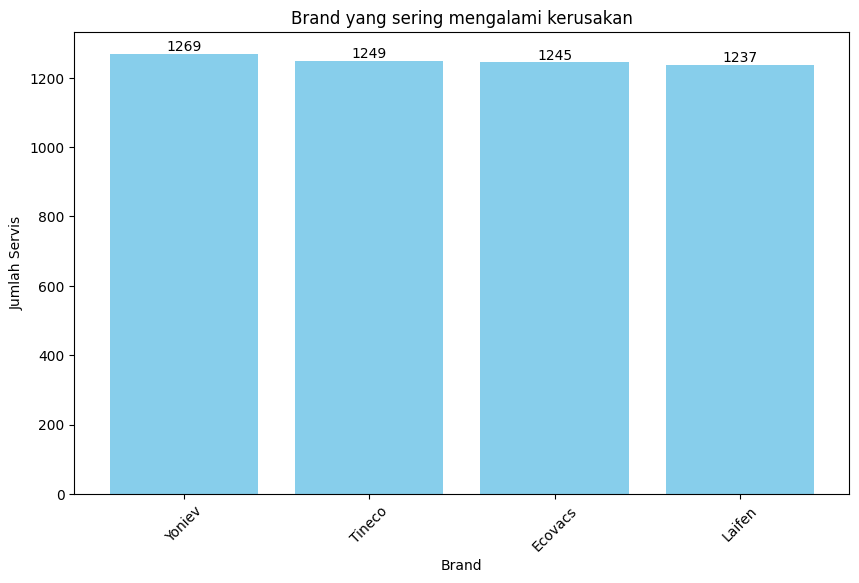

In [96]:
# Visualisasi brand yang sering mengalami kerusakan
top_brands = df['Brand'].value_counts().head(4)
print("Teknisi yang Tidak Sesuai Deadline:")
print(top_brands)
# Plot top 5 most serviced brands
plt.figure(figsize=(10, 6))
bars = plt.bar(top_brands.index, top_brands.values, color='skyblue')
plt.title('Brand yang sering mengalami kerusakan')
plt.xlabel('Brand')
plt.ylabel('Jumlah Servis')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.show()

Top 5 Kombinasi Barang dan Brand yang Paling Sering Diservis:
        Barang    Brand  Jumlah Servis
4           U5   Yoniev            648
0     A30S PET   Tineco            637
3        SWIFT   Laifen            631
6  X5 PRO OMNI  Ecovacs            626
5          U7S   Yoniev            621


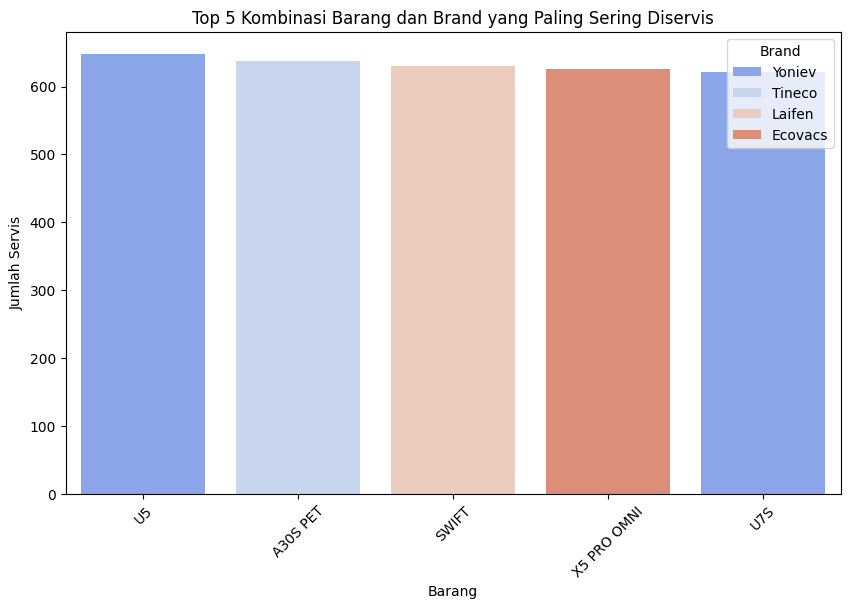

In [97]:
# Visualisasi Kombinasi Barang dan Brand yang Paling Sering Diservis
top_product_brand_combination = df.groupby(['Barang', 'Brand']).size().reset_index(name='Jumlah Servis')

top_product_brand_combination = top_product_brand_combination.sort_values(by='Jumlah Servis', ascending=False).head(5)


print("Top 5 Kombinasi Barang dan Brand yang Paling Sering Diservis:")
print(top_product_brand_combination)
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Barang', y='Jumlah Servis', hue='Brand', data=top_product_brand_combination, palette='coolwarm')
plt.title('Top 5 Kombinasi Barang dan Brand yang Paling Sering Diservis')
plt.xlabel('Barang')
plt.ylabel('Jumlah Servis')
plt.xticks(rotation=45)
plt.show()


  Teknisi  Selisih Hari Kerja
7    Heru            5.963082
4     Eko            6.062397
6    Gery            6.080871
0    Andi            6.085209
5   Firas            6.125382
1    Budi            6.206504
2    Coki            6.207752
3   David            6.232598


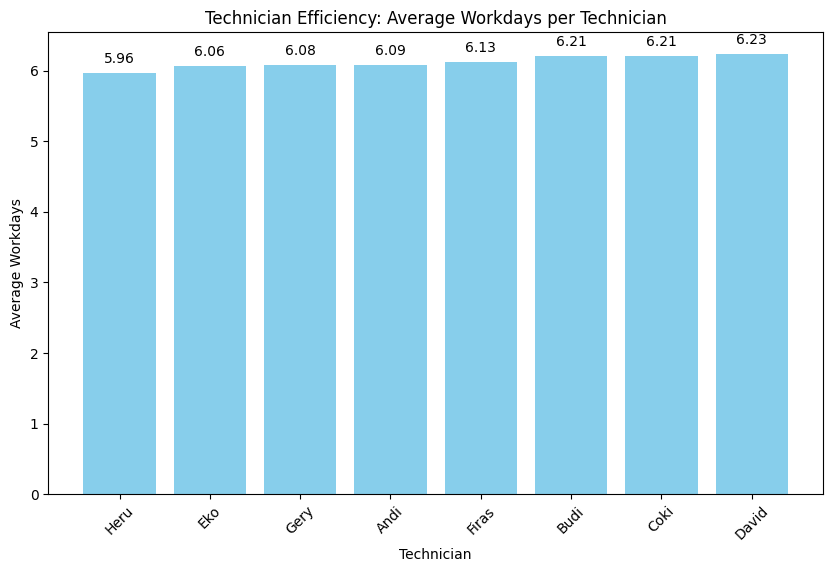

In [99]:
# Visualisasi efisiensi teknisi
tech_performance = df.groupby('Teknisi')['Selisih Hari Kerja'].mean().reset_index()
tech_performance = tech_performance.sort_values('Selisih Hari Kerja', ascending=True)
print(tech_performance)
# Plot the performance
plt.figure(figsize=(10, 6))
bars = plt.bar(tech_performance['Teknisi'], tech_performance['Selisih Hari Kerja'], color='skyblue')
plt.title('Technician Efficiency: Average Workdays per Technician')
plt.xlabel('Technician')
plt.ylabel('Average Workdays')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.show()

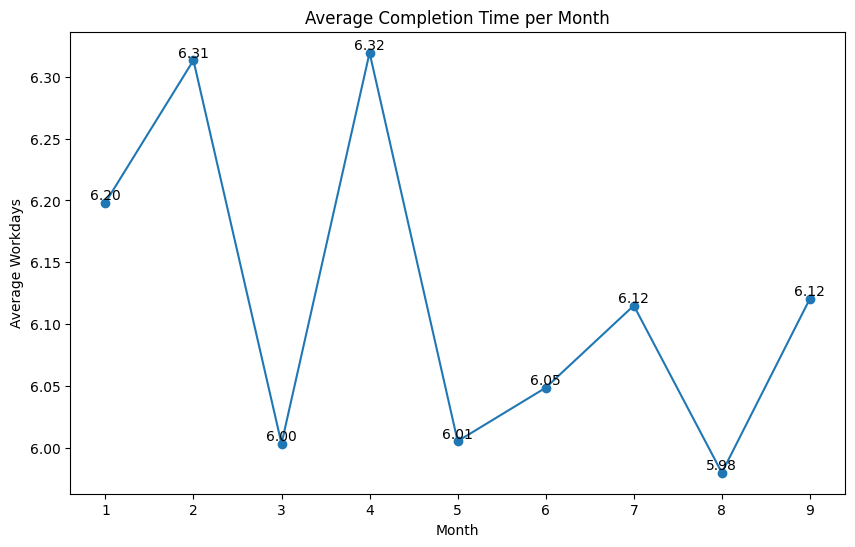

In [100]:
# Visualisasi rata2 penyelesaian servis per bulan
df['Tanggal Masuk'] = pd.to_datetime(df['Tanggal Masuk'])
df['Bulan Masuk'] = df['Tanggal Masuk'].dt.month
# Group by Month and calculate average workdays
monthly_completion = df.groupby('Bulan Masuk')['Selisih Hari Kerja'].mean().reset_index()
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_completion['Bulan Masuk'], monthly_completion['Selisih Hari Kerja'], marker='o')
plt.title('Average Completion Time per Month')
plt.xlabel('Month')
plt.ylabel('Average Workdays')

# Add data labels to the plot
for x, y in zip(monthly_completion['Bulan Masuk'], monthly_completion['Selisih Hari Kerja']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

Sesuai Deadline?
Tidak    51.4
Ya       48.6
Name: proportion, dtype: float64


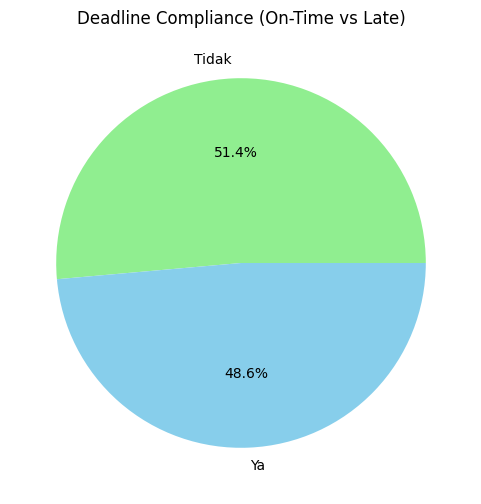

In [101]:
# Calculate percentage of services that met the deadline
deadline_compliance = df['Sesuai Deadline?'].value_counts(normalize=True) * 100

print(deadline_compliance)
# Plot the results
plt.figure(figsize=(6, 6))
plt.pie(deadline_compliance, labels=deadline_compliance.index, autopct='%1.1f%%', colors=['lightgreen', 'skyblue'])
plt.title('Deadline Compliance (On-Time vs Late)')
plt.show()




Brand       Ecovacs  Laifen  Tineco  Yoniev
Kota                                       
Bandung         253     271     261     234
Jakarta         224     232     240     271
Semarang        254     237     232     253
Surabaya        250     243     251     264
Yogyakarta      264     254     265     247


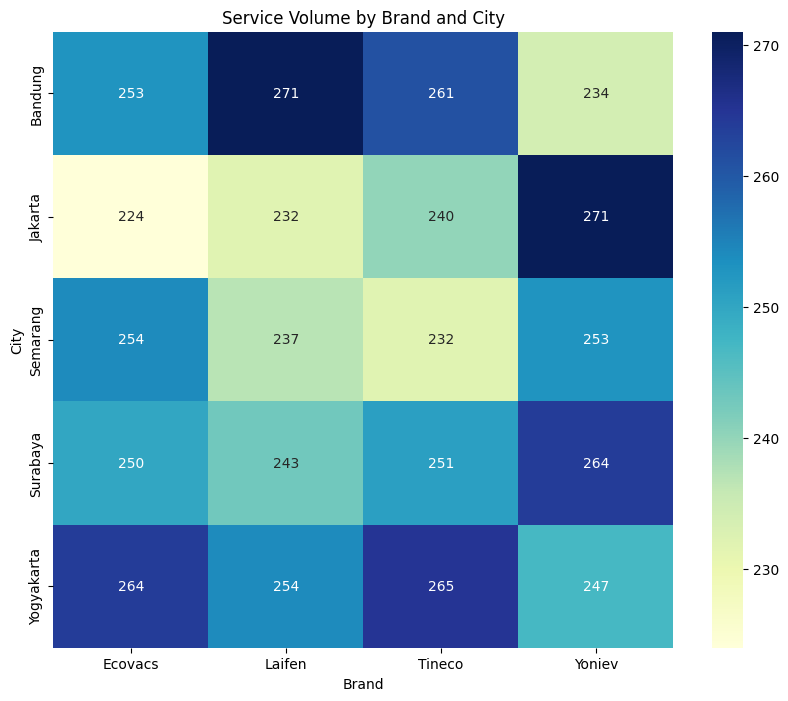

In [102]:
# Service Volume Heatmap by Brand and City
service_count = df.pivot_table(index='Kota', columns='Brand', aggfunc='size', fill_value=0)

print(service_count) # Added print statement to view the service count data
# Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(service_count, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Service Volume by Brand and City')
plt.xlabel('Brand')
plt.ylabel('City')
plt.show()


         Kota       Denda
0     Bandung  17992500.0
4  Yogyakarta  17400000.0
3    Surabaya  17220000.0
1     Jakarta  16710000.0
2    Semarang  16312500.0


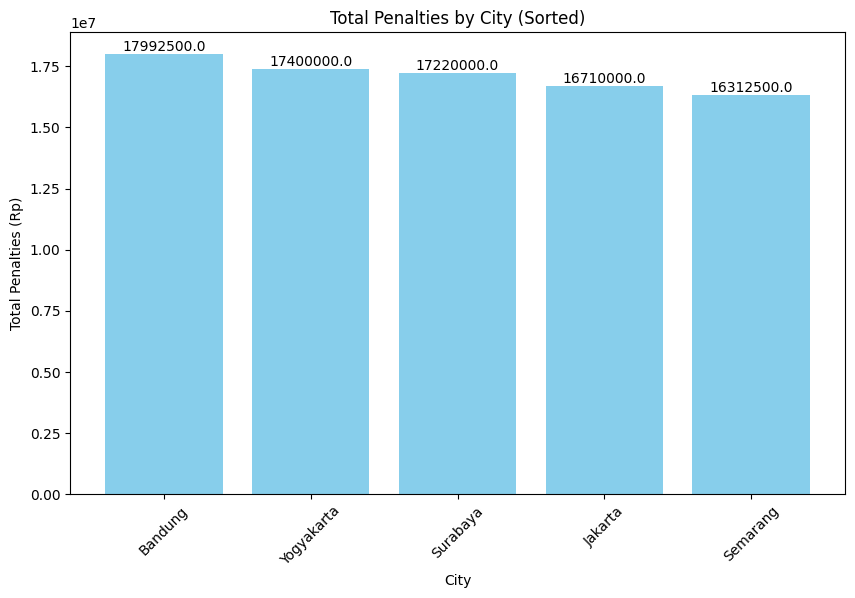

In [104]:
city_penalties_sorted = city_penalties.sort_values('Denda', ascending=False)
print(city_penalties_sorted)
# Plot the sorted data
plt.figure(figsize=(10, 6))
bars = plt.bar(city_penalties_sorted['Kota'], city_penalties_sorted['Denda'], color='skyblue')
plt.title('Total Penalties by City (Sorted)')
plt.xlabel('City')
plt.ylabel('Total Penalties (Rp)')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')


plt.show()

         Kota  Denda
4  Yogyakarta   1030
0     Bandung   1019
3    Surabaya   1008
2    Semarang    976
1     Jakarta    967


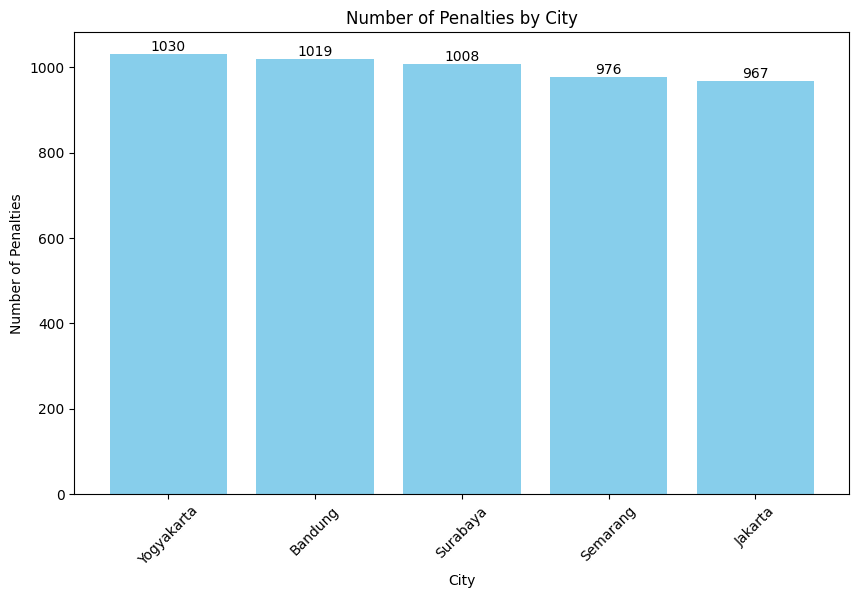

In [105]:
# Calculate the number of penalties by city
city_penalty_counts = df.groupby('Kota')['Denda'].count().reset_index()
city_penalty_counts = city_penalty_counts.sort_values('Denda', ascending=False)
print(city_penalty_counts)

# Plot the number of penalties by city
plt.figure(figsize=(10, 6))
bars = plt.bar(city_penalty_counts['Kota'], city_penalty_counts['Denda'], color='skyblue')
plt.title('Number of Penalties by City')
plt.xlabel('City')
plt.ylabel('Number of Penalties')
plt.xticks(rotation=45)

# Add data labels above the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.show()

# ... (Rest of your code) ...

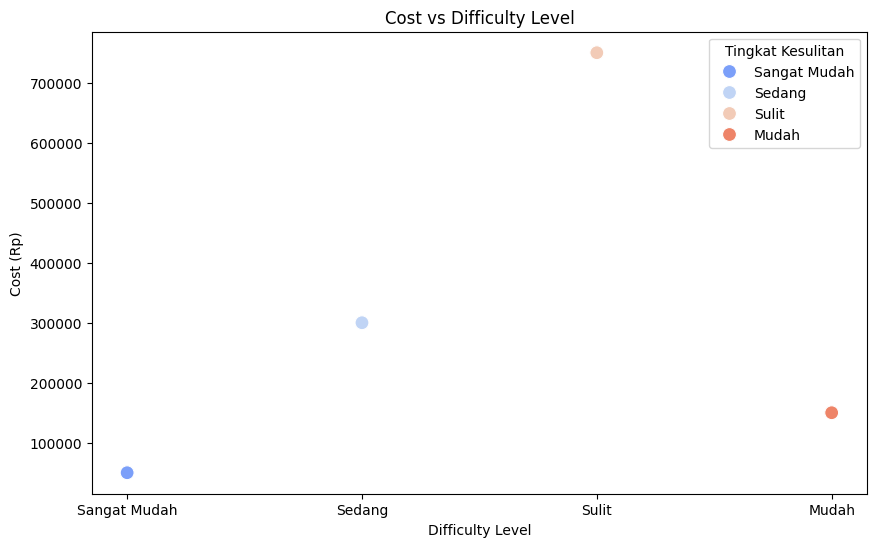

In [107]:
df['Biaya'] = df['Biaya'].replace('[Rp,.]', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tingkat Kesulitan', y='Biaya', data=df, hue='Tingkat Kesulitan', palette='coolwarm', s=100)
plt.title('Cost vs Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Cost (Rp)')
plt.show()


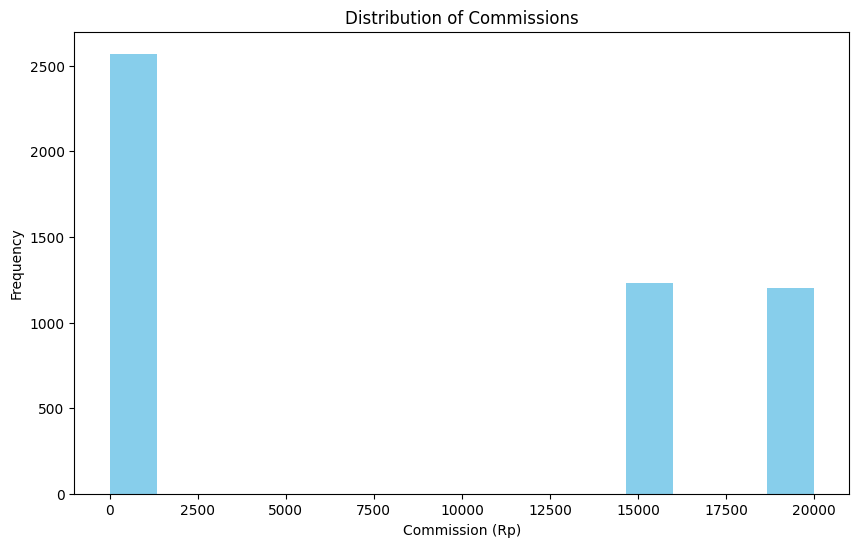

In [108]:
distribution = df['Komisi'] = df['Komisi'].replace('[Rp,.]', '', regex=True).astype(float)

# Plot histogram of commission distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Komisi'], bins=15, color='skyblue')
plt.title('Distribution of Commissions')
plt.xlabel('Commission (Rp)')
plt.ylabel('Frequency')
plt.show()


Tingkat Kesulitan
Sulit           1292
Sedang          1253
Mudah           1234
Sangat Mudah    1221
Name: count, dtype: int64


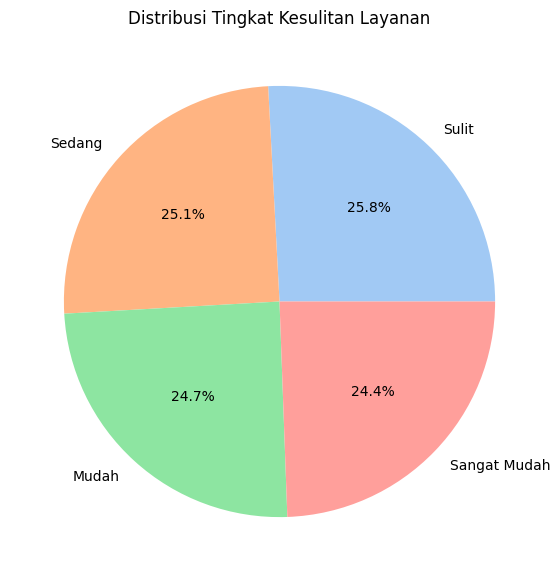

In [109]:
difficulty_distribution = df['Tingkat Kesulitan'].value_counts()

print(difficulty_distribution)
plt.figure(figsize=(7, 7))
difficulty_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribusi Tingkat Kesulitan Layanan')
plt.ylabel('')
plt.show()
